<a href="https://colab.research.google.com/github/S-Oktay-Bicici/LSB-Image-Steganografisi/blob/main/steganograf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#gerekli tüm kitaplıkları içe aktarıyoruz
import cv2
import numpy as np
import types
from google.colab.patches import cv2_imshow #Google colab crashes if you try to display 
#image using cv2.imshow() thus use this import

In [2]:
#Girilen veri türünü binary yapısına dönüştürmek için bir fonksiyon tanımlıyoruz,
#bunu kodlama ve kod çözme aşamasında gizli verileri ve piksel değerlerini ikiliye dönüştürmek için de kullanacağız. 
def messageToBinary(message):
  if type(message) == str:
    return ''.join([ format(ord(i), "08b") for i in message ])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message ]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    raise TypeError("Giriş türü desteklenmiyor")

In [3]:
# Gizli mesajı görüntüye gizleme işlevi
def hideData(image, secret_message):

  # kodlamak için maksimum baytı hesaplıyoruz
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes to encode:", n_bytes)

  #Kodlanacak bayt sayısının görüntüdeki maksimum bayttan az olup olmadığını kontrol ediyoruz
  if len(secret_message) > n_bytes:
      raise ValueError("Error encountered insufficient bytes, need bigger image or less data !!")
  
  secret_message += "#####" # sınırlandırma olarak herhangi bir dize kullanabiliriz

  data_index = 0
  # messageToBinary() işlevini kullanarak girdi verilerini binary biçime dönüştürüyoruz
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg) #Gizlenmesi gereken verilerin uzunluğunu buluyoruz
  for values in image:
      for pixel in values:
          # RGB değerlerini ikili biçime dönüştürüyoruz
          r, g, b = messageToBinary(pixel)
          # piksellerin en son bitine verileri ekliyoruz
          if data_index < data_len:
              # verileri kırmızı pikselin en son bitine ekliyoruz
              pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # verileri yeşil pikselin en son bitine ekliyoruz
              pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # verileri mavi pikselin en son bitine ekliyoruz
              pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          # veriler kodlanmışsa, döngüden çıkarıyoruz
          if data_index >= data_len:
              break

  return image

In [4]:
def showData(image):

  binary_data = ""
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
          binary_data += r[-1] #extracting data from the least significant bit of red pixel
          binary_data += g[-1] #extracting data from the least significant bit of red pixel
          binary_data += b[-1] #extracting data from the least significant bit of red pixel
  # split by 8-bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  # convert from bits to characters
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == "#####": #check if we have reached the delimeter which is "#####"
          break
  #print(decoded_data)
  return decoded_data[:-5] #remove the delimeter to show the original hidden message

In [5]:
# Verileri görüntüye kodlama
# Girilen görüntü adını ve gizli mesajı kullanıcıdan girdi olarak alan ve mesajı kodlamak için hideData()'yı çağıran fonksiyonu ekliyoruz
def encode_text(): 
  image_name = input("Resim adını girin (uzantılı): ") 
  image = cv2.imread(image_name) # OpenCV-Python kullanarak giriş görüntüsünü okuyoruz
  
  #details of the image
  print("Resmin bayt sayısı: ",image.shape) #içindeki bayt sayısını hesaplamak için görüntünün şeklini kontrol ediyoruz
  print("Orijinal görüntü aşağıda gösterildiği gibidir: ")
  resized_image = cv2.resize(image, (500, 500)) #görüntüyü ihtiyacınıza göre yeniden boyutlandırıyoruz
  cv2_imshow(resized_image) #görüntüyü gösteriyoruz
  
      
  data = input("Kodlanacak verileri girin: ") 
  if (len(data) == 0): 
    raise ValueError('Veri Boş')
  
  filename = input("Yeni kodlanmış resmin adını girin (uzantılı): ")
  encoded_image = hideData(image, data) # gizli mesajı seçilen görüntüye gizlemek için hideData işlevini çağırıyoruz
  cv2.imwrite(filename, encoded_image)


In [6]:
# Görüntüdeki verilerin kodunu çözme
def decode_text():
  # gizli resmi içeren resmi okuyoruz
  image_name = input("Kodunu çözmek istediğiniz steganograflı görüntünün adını girin (uzantısıyla birlikte):") 
  image = cv2.imread(image_name) #cv2.imread() kullanarak görüntüyü okuyoruz

  print("Steganographed görüntü aşağıda gösterildiği gibidir: ")
  resized_image = cv2.resize(image, (500, 500))  #görüntüyü ihtiyacınıza göre yeniden boyutlandırıyoruz
  cv2_imshow(resized_image) #görüntüyü gösteriyoruz
    
  text = showData(image)
  return text

In [7]:
# Ana İşlev         
def Steganography(): 
    a = input("Görüntü Steganografisi \n 1. Verileri kodla \n 2. Verilerin kodunu çöz \n Girişiniz: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nKodlama....")
      encode_text() 
          
    elif (userinput == 2):
      print("\nÇözümleme....") 
      print("Kodu çözülen mesaj " + decode_text()) 
    else: 
        raise Exception("Doğru girişi girin") 

Görüntü Steganografisi 
 1. Verileri kodla 
 2. Verilerin kodunu çöz 
 Girişiniz: 1

Kodlama....
Resim adını girin (uzantılı): klü.png
Resmin bayt sayısı:  (500, 500, 3)
Orijinal görüntü aşağıda gösterildiği gibidir: 


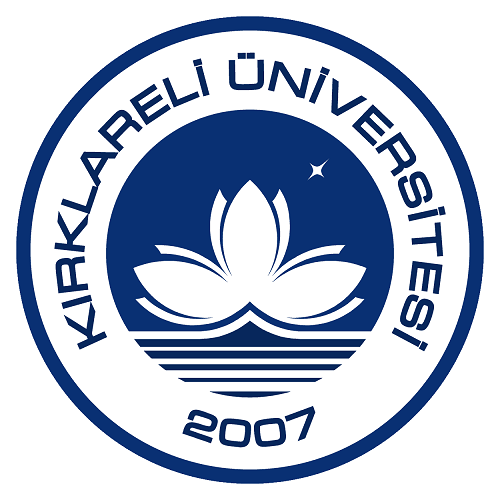

Kodlanacak verileri girin: hakunamatata
Yeni kodlanmış resmin adını girin (uzantılı): klu.png
Maximum bytes to encode: 93750


In [13]:
Steganography()

Görüntü Steganografisi 
 1. Verileri kodla 
 2. Verilerin kodunu çöz 
 Girişiniz: 2

Çözümleme....
Kodunu çözmek istediğiniz steganograflı görüntünün adını girin (uzantısıyla birlikte):klu.png
Steganographed görüntü aşağıda gösterildiği gibidir: 


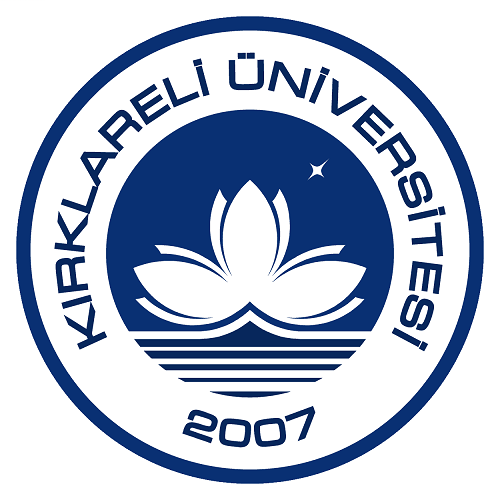

Kodu çözülen mesaj hakunamatata


In [14]:
Steganography()

# Yeni Bölüm